In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
import pandas as pd

In [58]:
train_identity = pd.read_csv("../input/train_identity.csv")
train_identity.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [59]:
train_transaction = pd.read_csv("../input/train_transaction.csv")
train_transaction.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test_identity = pd.read_csv("../input/test_identity.csv")
test_transaction = pd.read_csv("../input/test_transaction.csv")
sub = pd.read_csv("../input/sample_submission.csv")

In [61]:
test_identity.head(3)

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0


In [102]:
test_identity = test_identity.rename(
    columns={
        "id-01": "id_01",
        "id-02": "id_02",
        "id-03": "id_03",
        "id-04": "id_04",
        "id-05": "id_05",
        "id-06": "id_06",
        "id-07": "id_07",
        "id-08": "id_08",
        "id-09": "id_09",
        "id-10": "id_10",
        "id-11": "id_11",
        "id-12": "id_12",
        "id-13": "id_13",
        "id-14": "id_14",
        "id-15": "id_15",
        "id-16": "id_16",
        "id-17": "id_17",
        "id-18": "id_18",
        "id-19": "id_19",
        "id-20": "id_20",
        "id-21": "id_21",
        "id-22": "id_22",
        "id-23": "id_23",
        "id-24": "id_24",
        "id-25": "id_25",
        "id-26": "id_26",
        "id-27": "id_27",
        "id-28": "id_28",
        "id-29": "id_29",
        "id-30": "id_30",
        "id-31": "id_31",
        "id-32": "id_32",
        "id-33": "id_33",
        "id-34": "id_34",
        "id-35": "id_35",
        "id-36": "id_36",
        "id-37": "id_37",
        "id-38": "id_38",    
    }
)

In [103]:
train = pd.merge(
    train_transaction,
    train_identity,
    how="left", 
    on="TransactionID",
)
print(train.shape)
train.head(3)

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
test = pd.merge(
    test_transaction,
    test_identity,
    how="left",
    on="TransactionID",
)
print(test.shape)
test.head(3)

(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
print(train.isnull().sum().sum())
print("-"*10)
print(test.isnull().sum().sum())

115523073
----------
90186908


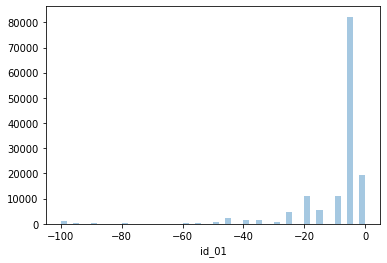

In [106]:
import seaborn as sns
sns.distplot(train["id_01"], kde=False);

In [107]:
train["id_03"].value_counts(dropna=False, normalize=True).head()

NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

In [108]:
train["id_11"].value_counts(dropna=False, normalize=True).head()

NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
Name: id_11, dtype: float64

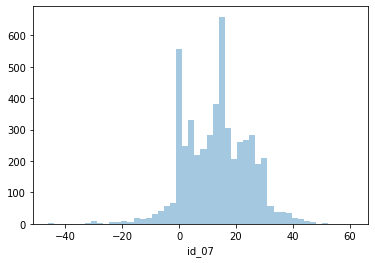

In [109]:
sns.distplot(train["id_07"], kde=False);

In [110]:
train["id_30"].value_counts(dropna=False, normalize=True).head()
### add plot ###

NaN           0.868654
Windows 10    0.035823
Windows 7     0.022200
iOS 11.2.1    0.006303
iOS 11.1.2    0.006264
Name: id_30, dtype: float64

In [111]:
train["id_31"].value_counts(dropna=False, normalize=True).head()
### add plot ###

NaN                      0.762451
chrome 63.0              0.037254
mobile safari 11.0       0.022730
mobile safari generic    0.019430
ie 11.0 for desktop      0.015291
Name: id_31, dtype: float64

In [112]:
train["id_33"].value_counts(dropna=False, normalize=True).head()
### add plot ###

NaN          0.875895
1920x1080    0.028574
1366x768     0.014571
1334x750     0.010917
2208x1242    0.008297
Name: id_33, dtype: float64

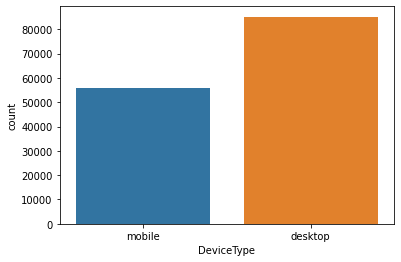

In [113]:
sns.countplot(train["DeviceType"]);

In [114]:
train["DeviceInfo"].value_counts(dropna=False, normalize=True).head()
### add plot ###

NaN            0.799055
Windows        0.080811
iOS Device     0.033498
MacOS          0.021291
Trident/7.0    0.012599
Name: DeviceInfo, dtype: float64

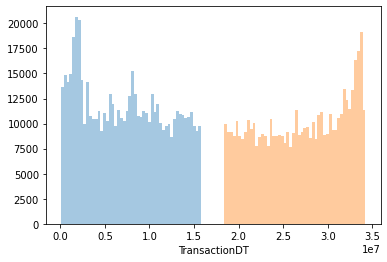

In [115]:
sns.distplot(train["TransactionDT"], kde=False);
sns.distplot(test["TransactionDT"], kde=False);

In [116]:
for col in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    print(train[col].value_counts(dropna=False, normalize=True).head())
    print("-"*10)

W    0.744522
C    0.116028
R    0.063838
H    0.055922
S    0.019690
Name: ProductCD, dtype: float64
----------
visa                0.651551
mastercard          0.320414
american express    0.014102
discover            0.011263
NaN                 0.002670
Name: card4, dtype: float64
----------
debit              0.744976
credit             0.252288
NaN                0.002660
debit or credit    0.000051
charge card        0.000025
Name: card6, dtype: float64
----------
NaN    0.476588
M0     0.332585
M2     0.101373
M1     0.089454
Name: M4, dtype: float64
----------
T      0.540886
NaN    0.459071
F      0.000042
Name: M1, dtype: float64
----------
T      0.483402
NaN    0.459071
F      0.057527
Name: M2, dtype: float64
----------
NaN    0.459071
T      0.426273
F      0.114656
Name: M3, dtype: float64
----------
NaN    0.593494
F      0.224356
T      0.182150
Name: M5, dtype: float64
----------
F      0.385843
T      0.327368
NaN    0.286788
Name: M6, dtype: float64
----------
NaN 

In [117]:
for col in ['P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    print(train[col].value_counts(dropna=False, normalize=True).head())
    print("-"*10)

gmail.com        0.386688
yahoo.com        0.170918
NaN              0.159949
hotmail.com      0.076625
anonymous.com    0.062651
Name: P_emaildomain, dtype: float64
----------
NaN              0.767516
gmail.com        0.096771
hotmail.com      0.046583
anonymous.com    0.034763
yahoo.com        0.020053
Name: R_emaildomain, dtype: float64
----------
7919     0.025285
9500     0.023981
15885    0.017545
17188    0.017516
15066    0.013454
Name: card1, dtype: float64
----------
321.0    0.082865
111.0    0.076525
555.0    0.071113
490.0    0.064593
583.0    0.036920
Name: card2, dtype: float64
----------
150.0    0.882729
185.0    0.095414
106.0    0.002660
NaN      0.002650
146.0    0.002120
Name: card3, dtype: float64
----------
226.0    0.502161
224.0    0.138031
166.0    0.096759
102.0    0.049285
117.0    0.043928
Name: card5, dtype: float64
----------
NaN      0.111264
299.0    0.078462
325.0    0.072393
204.0    0.071155
264.0    0.067514
Name: addr1, dtype: float64
----------
8

In [118]:
train["DeviceInfo"].value_counts(dropna=False, normalize=True).head()
### add plot ###

NaN            0.799055
Windows        0.080811
iOS Device     0.033498
MacOS          0.021291
Trident/7.0    0.012599
Name: DeviceInfo, dtype: float64

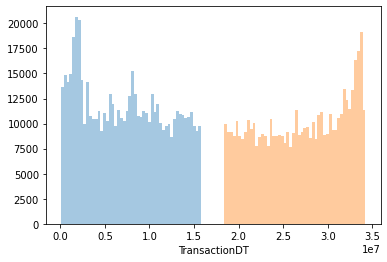

In [119]:
sns.distplot(train["TransactionDT"], kde=False);
sns.distplot(test["TransactionDT"], kde=False);

In [120]:
for col in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    print(train[col].value_counts(dropna=False, normalize=True).head())
    print("-"*10)

W    0.744522
C    0.116028
R    0.063838
H    0.055922
S    0.019690
Name: ProductCD, dtype: float64
----------
visa                0.651551
mastercard          0.320414
american express    0.014102
discover            0.011263
NaN                 0.002670
Name: card4, dtype: float64
----------
debit              0.744976
credit             0.252288
NaN                0.002660
debit or credit    0.000051
charge card        0.000025
Name: card6, dtype: float64
----------
NaN    0.476588
M0     0.332585
M2     0.101373
M1     0.089454
Name: M4, dtype: float64
----------
T      0.540886
NaN    0.459071
F      0.000042
Name: M1, dtype: float64
----------
T      0.483402
NaN    0.459071
F      0.057527
Name: M2, dtype: float64
----------
NaN    0.459071
T      0.426273
F      0.114656
Name: M3, dtype: float64
----------
NaN    0.593494
F      0.224356
T      0.182150
Name: M5, dtype: float64
----------
F      0.385843
T      0.327368
NaN    0.286788
Name: M6, dtype: float64
----------
NaN 

In [121]:
for col in ['P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    print(train[col].value_counts(dropna=False, normalize=True).head())
    print("-"*10)

gmail.com        0.386688
yahoo.com        0.170918
NaN              0.159949
hotmail.com      0.076625
anonymous.com    0.062651
Name: P_emaildomain, dtype: float64
----------
NaN              0.767516
gmail.com        0.096771
hotmail.com      0.046583
anonymous.com    0.034763
yahoo.com        0.020053
Name: R_emaildomain, dtype: float64
----------
7919     0.025285
9500     0.023981
15885    0.017545
17188    0.017516
15066    0.013454
Name: card1, dtype: float64
----------
321.0    0.082865
111.0    0.076525
555.0    0.071113
490.0    0.064593
583.0    0.036920
Name: card2, dtype: float64
----------
150.0    0.882729
185.0    0.095414
106.0    0.002660
NaN      0.002650
146.0    0.002120
Name: card3, dtype: float64
----------
226.0    0.502161
224.0    0.138031
166.0    0.096759
102.0    0.049285
117.0    0.043928
Name: card5, dtype: float64
----------
NaN      0.111264
299.0    0.078462
325.0    0.072393
204.0    0.071155
264.0    0.067514
Name: addr1, dtype: float64
----------
8

In [122]:
train["TransactionAmt_to_mean_card1"] = train["TransactionAmt"] / train.groupby(["card1"])["TransactionAmt"].transform("mean")
train["TransactionAmt_to_mean_card4"] = train["TransactionAmt"] / train.groupby(["card4"])["TransactionAmt"].transform("mean")
test["TransactionAmt_to_mean_card1"] = test["TransactionAmt"] / test.groupby(["card1"])["TransactionAmt"].transform("mean")
test["TransactionAmt_to_mean_card4"] = test["TransactionAmt"] / test.groupby(["card4"])["TransactionAmt"].transform("mean")

train["TransactionAmt_to_std_card1"] = train["TransactionAmt"] / train.groupby(["card1"])["TransactionAmt"].transform("std")
train["TransactionAmt_to_std_card4"] = train["TransactionAmt"] / train.groupby(["card4"])["TransactionAmt"].transform("std")
test["TransactionAmt_to_std_card1"] = test["TransactionAmt"] / test.groupby(["card1"])["TransactionAmt"].transform("std")
test["TransactionAmt_to_std_card4"] = test["TransactionAmt"] / test.groupby(["card4"])["TransactionAmt"].transform("std")


In [123]:
train["D15_to_mean_card1"] = train["D15"] / train.groupby(["card1"])["D15"].transform("mean")
train["D15_to_mean_card4"] = train["D15"] / train.groupby(["card4"])["D15"].transform("mean")
test["D15_to_mean_card1"] = test["D15"] / test.groupby(["card1"])["D15"].transform("mean")
test["D15_to_mean_card4"] = test["D15"] / test.groupby(["card4"])["D15"].transform("mean")

train["D15_to_std_card1"] = train["D15"] / train.groupby(["card1"])["D15"].transform("std")
train["D15_to_std_card4"] = train["D15"] / train.groupby(["card4"])["D15"].transform("std")
test["D15_to_std_card1"] = test["D15"] / test.groupby(["card1"])["D15"].transform("std")
test["D15_to_std_card4"] = test["D15"] / test.groupby(["card4"])["D15"].transform("std")

train["D15_to_mean_addr1"] = train["D15"] / train.groupby(["addr1"])["D15"].transform("mean")
train["D15_to_mean_addr2"] = train["D15"] / train.groupby(["addr2"])["D15"].transform("mean")
test["D15_to_mean_addr1"] = test["D15"] / test.groupby(["addr1"])["D15"].transform("mean")
test["D15_to_mean_addr2"] = test["D15"] / test.groupby(["addr2"])["D15"].transform("mean")

train["D15_to_std_addr1"] = train["D15"] / train.groupby(["addr1"])["D15"].transform("std")
train["D15_to_std_addr2"] = train["D15"] / train.groupby(["addr2"])["D15"].transform("std")
test["D15_to_std_addr1"] = test["D15"] / test.groupby(["addr1"])["D15"].transform("std")
test["D15_to_std_addr2"] = test["D15"] / test.groupby(["addr2"])["D15"].transform("std")


In [124]:
train["id_02_to_mean_card1"] = train["id_02"] / train.groupby(["card1"])["id_02"].transform("mean")
train["id_02_to_mean_card4"] = train["id_02"] / train.groupby(["card4"])["id_02"].transform("mean")
train["id_02_to_std_card1"] = train["id_02"] / train.groupby(["card1"])["id_02"].transform("std")
train["id_02_to_std_card4"] = train["id_02"] / train.groupby(["card4"])["id_02"].transform("std")

test["id_02_to_mean_card1"] = test["id_02"] / test.groupby(["card1"])["id_02"].transform("mean")
test["id_02_to_mean_card4"] = test["id_02"] / test.groupby(["card4"])["id_02"].transform("mean")
test["id_02_to_std_card1"] = test["id_02"] / test.groupby(["card1"])["id_02"].transform("std")
test["id_02_to_std_card4"] = test["id_02"] / test.groupby(["card4"])["id_02"].transform("std")


In [125]:
train[["P_emaildomain_1", "P_emaildomain_2", "P_emaildomain_3"]] = train["P_emaildomain"].str.split(".", expand=True)
train[["R_emaildomain_1", "R_emaildomain_2", "R_emaildomain_3"]] = train["R_emaildomain"].str.split(".", expand=True)

test[["P_emaildomain_1", "P_emaildomain_2", "P_emaildomain_3"]] = test["P_emaildomain"].str.split(".", expand=True)
test[["R_emaildomain_1", "R_emaildomain_2", "R_emaildomain_3"]] = test["R_emaildomain"].str.split(".", expand=True)


In [126]:
many_null_cols_in_train = [col for col in train.columns if train[col].isnull().sum()/train.shape[0] > 0.9] 
many_null_cols_in_test = [col for col in test.columns if test[col].isnull().sum()/test.shape[0] > 0.9] 


In [127]:
big_top_val_cols_in_train = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_val_cols_in_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]


In [128]:
cols_to_drop = list(set(many_null_cols_in_train + big_top_val_cols_in_train + many_null_cols_in_test + big_top_val_cols_in_test))
cols_to_drop.remove("isFraud")
#cols_to_drop

In [129]:
train = train.drop(cols_to_drop, axis=1)

In [ ]:
test = test.drop(cols_to_drop, axis=1)

In [ ]:
train.to_csv("../input/train.csv", index=False)
test.to_csv("../input/test.csv", index=False)

In [ ]:
cat_cols = [
    'id_12', 
    'id_13', 
    'id_14', 
    'id_15', 
    'id_16', 
    'id_17', 
    'id_18', 
    'id_19', 
    'id_20', 
    'id_21', 
    'id_22', 
    'id_23', 
    'id_24', 
    'id_25', 
    'id_26', 
    'id_27', 
    'id_28', 
    'id_29',        
    'id_30', 
    'id_31', 
    'id_32', 
    'id_33', 
    'id_34', 
    'id_35', 
    'id_36', 
    'id_37', 
    'id_38', 
    'DeviceType', 
    'DeviceInfo', 
    'ProductCD', 
    'card4', 
    'card6', 
    'M4',
    'P_emaildomain',
    'R_emaildomain', 
    'card1', 
    'card2', 
    'card3',  
    'card5', 
    'addr1', 
    'addr2', 
    'M1', 
    'M2', 
    'M3', 
    'M5', 
    'M6', 
    'M7', 
    'M8', 
    'M9',
    'P_emaildomain_1', 
    'P_emaildomain_2', 
    'P_emaildomain_3', 
    'R_emaildomain_1', 
    'R_emaildomain_2', 
    'R_emaildomain_3'
]

In [ ]:
from sklearn import preprocessing

for col in cat_cols:
    if col in train.columns:
        lbl_enc = preprocessing.LabelEncoder()
        lbl_enc.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = lbl_enc.transform(list(train[col].astype(str).values))
        test[col] = lbl_enc.transform(list(test[col].astype(str).values))

In [ ]:
X_train = train.sort_values("TransactionDT").drop(["TransactionID", "isFraud", "TransactionDT"], axis=1)
y_train = train.sort_values("TransactionDT")["isFraud"]

In [ ]:
X_test = test.drop(["TransactionID", "TransactionDT"], axis=1)

In [ ]:
import numpy as np

def clean_inf_val_to_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)

X_train = clean_inf_val_to_nan(X_train)
X_test = clean_inf_val_to_nan(X_test)

In [ ]:
from sklearn import model_selection

xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)


In [ ]:
import lightgbm as lgb
from sklearn import metrics

model = lgb.LGBMClassifier()
model.fit(xtrain, ytrain)

pred = model.predict(xvalid)

accuracy = metrics.accuracy_score(yvalid, pred)
print(f"accuracy score={accuracy}%")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = pd.DataFrame()
importance["feature"] = xtrain.columns
importance["importance"] = model.feature_importances_

plt.figure(figsize=(20,10))
sns.barplot(data=importance, x="importance", y="feature");
plt.show()

In [133]:
train.to_csv("../input/train.csv", index=False)
test.to_csv("../input/test.csv", index=False)

In [134]:
cat_cols = [
    'id_12', 
    'id_13', 
    'id_14', 
    'id_15', 
    'id_16', 
    'id_17', 
    'id_18', 
    'id_19', 
    'id_20', 
    'id_21', 
    'id_22', 
    'id_23', 
    'id_24', 
    'id_25', 
    'id_26', 
    'id_27', 
    'id_28', 
    'id_29',        
    'id_30', 
    'id_31', 
    'id_32', 
    'id_33', 
    'id_34', 
    'id_35', 
    'id_36', 
    'id_37', 
    'id_38', 
    'DeviceType', 
    'DeviceInfo', 
    'ProductCD', 
    'card4', 
    'card6', 
    'M4',
    'P_emaildomain',
    'R_emaildomain', 
    'card1', 
    'card2', 
    'card3',  
    'card5', 
    'addr1', 
    'addr2', 
    'M1', 
    'M2', 
    'M3', 
    'M5', 
    'M6', 
    'M7', 
    'M8', 
    'M9',
    'P_emaildomain_1', 
    'P_emaildomain_2', 
    'P_emaildomain_3', 
    'R_emaildomain_1', 
    'R_emaildomain_2', 
    'R_emaildomain_3'
]

In [138]:
from sklearn import preprocessing

for col in cat_cols:
    if col in train.columns:
        lbl_enc = preprocessing.LabelEncoder()
        lbl_enc.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = lbl_enc.transform(list(train[col].astype(str).values))
        test[col] = lbl_enc.transform(list(test[col].astype(str).values))

In [141]:
X_train = train.sort_values("TransactionDT").drop(["TransactionID", "isFraud", "TransactionDT"], axis=1)
y_train = train.sort_values("TransactionDT")["isFraud"]

In [143]:
X_test = test.drop(["TransactionID", "TransactionDT"], axis=1)

In [144]:
import numpy as np

def clean_inf_val_to_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)

X_train = clean_inf_val_to_nan(X_train)
X_test = clean_inf_val_to_nan(X_test)

In [146]:
from sklearn import model_selection

xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)


In [150]:
import lightgbm as lgb
from sklearn import metrics

model = lgb.LGBMClassifier()
model.fit(xtrain, ytrain)

pred = model.predict(xvalid)

accuracy = metrics.accuracy_score(yvalid, pred)
print(f"accuracy score={accuracy}%")

accuracy score=0.9776983777559521%


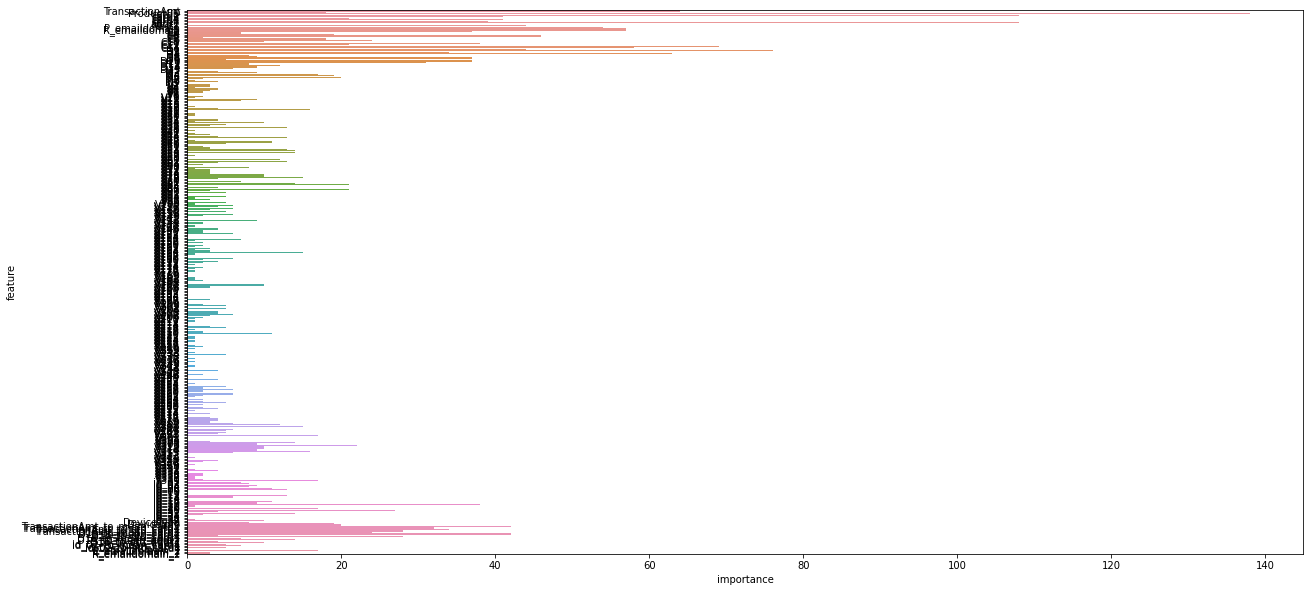

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = pd.DataFrame()
importance["feature"] = xtrain.columns
importance["importance"] = model.feature_importances_

plt.figure(figsize=(20,10))
sns.barplot(data=importance, x="importance", y="feature");
plt.show()